In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1a

#  How many rows are there in the dataframe? What does a row represent in this dataset? What is the “grain”?

In [127]:

#reading the data
jdf=pd.read_csv('JEOPARDY_CSV.csv')
jdf.head(-10)

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,12/31/2004,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,12/31/2004,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,12/31/2004,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,12/31/2004,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,12/31/2004,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams
...,...,...,...,...,...,...,...
216915,4999,5/11/2006,Double Jeopardy!,AUTHORS IN THEIR YOUTH,"$1,200",In his teens he worked in an assistant D.A.'s ...,(Erle Stanley) Gardner
216916,4999,5/11/2006,Double Jeopardy!,QUOTATIONS,"$2,200","Oscar Wilde called this 4-letter word ""the cur...",work
216917,4999,5/11/2006,Double Jeopardy!,WORLD CAPITALS,"$3,400",Guyanese capital named for a Hanoverian monarch,Georgetown
216918,4999,5/11/2006,Double Jeopardy!,OFF-BROADWAY,"$1,600","A naughty 18th c. novel originally titled ""Mem...",Fanny Hill


In [128]:
jdf.shape
#there are 216930 rows, 7 columns

(216930, 7)

# 1b

#   Clean the data. How do you need to “clean” it? What is “dirty” about this data?

In [129]:
# cleaning 1: replacing $ character with space so that the Value column can be treated mathematically later
jdf[' Value'] = jdf[' Value'].astype(str)
jdf[' Value'] = jdf[' Value'].str.replace("$","")

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_16268\2647479538.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  jdf[' Value'] = jdf[' Value'].str.replace("$","")


In [130]:
# cleaning 2: deleting the "," character in the ' Value' column so that it can be treated mathematically later
jdf[' Value'] = jdf[' Value'].replace(',','', regex=True)

In [117]:
jdf

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,12/31/2004,Jeopardy!,HISTORY,200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,12/31/2004,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,12/31/2004,Jeopardy!,EVERYBODY TALKS ABOUT IT...,200,The city of Yuma in this state has a record av...,Arizona
3,4680,12/31/2004,Jeopardy!,THE COMPANY LINE,200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,12/31/2004,Jeopardy!,EPITAPHS & TRIBUTES,200,"Signer of the Dec. of Indep., framer of the Co...",John Adams
...,...,...,...,...,...,...,...
216925,4999,5/11/2006,Double Jeopardy!,RIDDLE ME THIS,2000,This Puccini opera turns on the solution to 3 ...,Turandot
216926,4999,5/11/2006,Double Jeopardy!,"""T"" BIRDS",2000,In North America this term is properly applied...,a titmouse
216927,4999,5/11/2006,Double Jeopardy!,AUTHORS IN THEIR YOUTH,2000,"In Penny Lane, where this ""Hellraiser"" grew up...",Clive Barker
216928,4999,5/11/2006,Double Jeopardy!,QUOTATIONS,2000,"From Ft. Sill, Okla. he made the plea, Arizona...",Geronimo


In [131]:
#cleaning 3: replacing "None" values in the ' Value' column so that it can be treated mathematically later
jdf[' Value'] = jdf[' Value'].replace(['None'],'0')

In [132]:
#cleaning 4: turning the items in the ' Value' column to integers
jdf[' Value'] = jdf[' Value'].astype(int)

In [133]:
list(jdf)

['Show Number',
 ' Air Date',
 ' Round',
 ' Category',
 ' Value',
 ' Question',
 ' Answer']

In [134]:
#cleaning 5: removing the space from the beginning of the column names:
jdf.columns = jdf.columns.str.replace(' ', '')
list(jdf)

['ShowNumber', 'AirDate', 'Round', 'Category', 'Value', 'Question', 'Answer']

# 1c

#  How many unique shows were there each year?

In [135]:
#turning the values in the ' Air Date' column to datetime
jdf['AirDate'] = pd.to_datetime(jdf['AirDate'])

In [136]:
#checking whether they indeed turned to datetime
jdf.info()
jdf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216930 entries, 0 to 216929
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   ShowNumber  216930 non-null  int64         
 1   AirDate     216930 non-null  datetime64[ns]
 2   Round       216930 non-null  object        
 3   Category    216930 non-null  object        
 4   Value       216930 non-null  int32         
 5   Question    216930 non-null  object        
 6   Answer      216928 non-null  object        
dtypes: datetime64[ns](1), int32(1), int64(1), object(4)
memory usage: 10.8+ MB


,ShowNumber,AirDate,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,200,The city of Yuma in this state has a record av...,Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


In [137]:
#parsing the datetime values into year, month and day
jdf['Date'] = jdf['AirDate'].dt.strftime('%m-%d-%Y')

In [138]:
#creating a separate year column 
jdf['Year'] = jdf['AirDate'].dt.strftime('%Y')

In [139]:
#turning years into integers so that they can be sorted 
jdf['Year'] = jdf['Year'].astype(int)

In [152]:
jdf.sort_values('Year')

,ShowNumber,AirDate,Round,Category,Value,Question,Answer,Date,Year,Month
48803,61,1984-12-03,Jeopardy!,SPORTS,500,The number of laps run in the Indy 500,200,12-03-1984,1984,12
164696,3,1984-09-12,Jeopardy!,BROADWAY,500,100s of former cast members appeared onstage w...,A Chorus Line,09-12-1984,1984,09
127865,5,1984-09-14,Jeopardy!,AMERICAN LITERATURE,100,Melville's white whale tale,Moby Dick,09-14-1984,1984,09
127866,5,1984-09-14,Jeopardy!,ALL NUMBERS,100,"It was ""enough"" for Dick van Patten",Eight,09-14-1984,1984,09
127867,5,1984-09-14,Jeopardy!,RELIGION,100,Country that is home to Parsis & Sikhs,India,09-14-1984,1984,09
...,...,...,...,...,...,...,...,...,...,...
111209,6281,2012-01-02,Jeopardy!,RECENT BOOKS,800,"""Here Comes Trouble"", a look back by this pot-...",Michael Moore,01-02-2012,2012,01
111208,6281,2012-01-02,Jeopardy!,PREFIXES,1200,"""Anti-"" means ""against; ""ante-"" means this",before,01-02-2012,2012,01
111207,6281,2012-01-02,Jeopardy!,ARTHUR'S CAMELOT,800,"""The Simple Joys of Maidenhood"" is one of her ...",Guinevere,01-02-2012,2012,01
111205,6281,2012-01-02,Jeopardy!,"C.S., I",600,"Some say when it comes to his films ""Heathers""...",(Christian) Slater,01-02-2012,2012,01


In [153]:
#counting the number of shows per year
jdf.groupby('Year').count()["ShowNumber"]

Year
1984     1179
1985      888
1986     1409
1987     1275
1988     1290
1989     2067
1990     4337
1991     1444
1992     1885
1993     2132
1994     1136
1995     1138
1996     4891
1997    13099
1998    13143
1999    13540
2000    13439
2001    12097
2002     6859
2003     9426
2004    13190
2005    13560
2006    13726
2007    13940
2008    14036
2009    13579
2010    13756
2011    13376
2012     1093
Name: ShowNumber, dtype: int64

In [154]:
#checking that the total number of shows is equal to the number of lines
jdf.groupby('Year').count().sum()

ShowNumber    216930
AirDate       216930
Round         216930
Category      216930
Value         216930
Question      216930
Answer        216928
Date          216930
Month         216930
dtype: int64

In [155]:
#creating a separate month column 
jdf['Month'] = jdf['AirDate'].dt.strftime('%m')

In [156]:
jdf.head(10)

,ShowNumber,AirDate,Round,Category,Value,Question,Answer,Date,Year,Month
0,4680,2004-12-31,Jeopardy!,HISTORY,200,"For the last 8 years of his life, Galileo was ...",Copernicus,12-31-2004,2004,12
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe,12-31-2004,2004,12
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,200,The city of Yuma in this state has a record av...,Arizona,12-31-2004,2004,12
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's,12-31-2004,2004,12
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,200,"Signer of the Dec. of Indep., framer of the Co...",John Adams,12-31-2004,2004,12
5,4680,2004-12-31,Jeopardy!,3-LETTER WORDS,200,"In the title of an Aesop fable, this insect sh...",the ant,12-31-2004,2004,12
6,4680,2004-12-31,Jeopardy!,HISTORY,400,Built in 312 B.C. to link Rome & the South of ...,the Appian Way,12-31-2004,2004,12
7,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,400,"No. 8: 30 steals for the Birmingham Barons; 2,...",Michael Jordan,12-31-2004,2004,12
8,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,400,"In the winter of 1971-72, a record 1,122 inche...",Washington,12-31-2004,2004,12
9,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,400,This housewares store was named for the packag...,Crate & Barrel,12-31-2004,2004,12


In [157]:
jdf.to_csv('jdf_tidy.csv')

# 1d
#  How many times was each category used?

In [158]:
# group all shows by Category, count the occurence of each category, show only the ShowNumber column, transforming the resulting series to a dataframe and sort it according to the ShowNumber count values
categ_df_sorted =jdf.groupby('Category').count()['ShowNumber'].to_frame().sort_values("ShowNumber")
categ_df_sorted

,ShowNumber
Category,
GEOGRAPHIC MEANINGS,1
POETIC SUBJECTS,1
BOOK TITLE REFERENCES,1
IN VENICE,1
THE THIRD CENTURY,1
...,...
POTPOURRI,401
AMERICAN HISTORY,418
LITERATURE,496


In [147]:
#show the list of the different show occurences 
categ_df_sorted["ShowNumber"].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
       110, 112, 113, 114, 115, 117, 118, 120, 122, 123, 124, 125, 129,
       131, 132, 133, 134, 136, 137, 139, 140, 141, 144, 145, 146, 151,
       152, 153, 154, 156, 157, 158, 159, 164, 166, 170, 174, 175, 177,
       180, 182, 183, 184, 188, 189, 194, 197, 198, 199, 203, 204, 205,
       206, 207, 212, 214, 218, 220, 221, 222, 226, 230, 232, 233, 234,
       236, 240, 242, 243, 244, 245, 246, 250, 255, 258, 267, 27

In [159]:
#show the frequency of different occurences; e.g. there were 1044 catgeories that occured only once
occ_freq=categ_df_sorted["ShowNumber"].value_counts().to_frame().sort_index()
occ_freq

,ShowNumber
1,1044
2,229
3,476
4,665
5,20694
...,...
401,1
418,1
496,1
519,1


# 1e
# Which month (over the years) has had the most shows?

In [181]:
jdf.groupby('Month').count().sort_values('ShowNumber', ascending=False)['ShowNumber'].to_frame()

,ShowNumber
Month,
11,25672
01,21128
05,21052
12,20875
10,20510
03,19731
04,19654
06,19331
02,17501


In [ ]:
# November had the most shows

# 1f
# Are there any answers that appeared multiple times? Find the questions for the top three most common answers.

In [177]:
jdf.groupby('Answer').count().sort_values('ShowNumber', ascending=False).head(3)["ShowNumber"].to_frame()

,ShowNumber
Answer,
China,216
Australia,215
Japan,196


In [180]:
#checking for the most common answer
len(jdf[jdf["Answer"]=="China"])

216

In [ ]:
# 'China', 'Australia', 'Japan' are the most common answers

# 2
# Create a visualization that shows the top 5 categories (those referenced the most often). Be sure to label appropriately.

In [196]:
categories_count=jdf.groupby('Category').count().sort_values('ShowNumber', ascending=False).head(5)["ShowNumber"].to_frame()
categories_count

,ShowNumber
Category,
BEFORE & AFTER,547
SCIENCE,519
LITERATURE,496
AMERICAN HISTORY,418
POTPOURRI,401


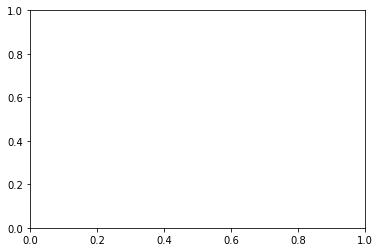

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_16268\427410353.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(categories_count.index, rotation =45, fontsize=12)


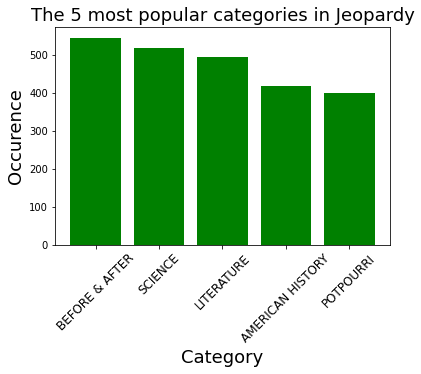

In [211]:
fig, ax = plt.subplots()
ax.bar(categories_count.index, categories_count["ShowNumber"], label = "ShowNumber", color = "green" )
ax.set_xlabel("Category", fontsize=18) 
ax.set_ylabel("Occurence", fontsize=18)
ax.set_xticklabels(categories_count.index, rotation =45, fontsize=12)
ax.set_title("The 5 most popular categories in Jeopardy", fontsize=18)
plt.show()